## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [0.01, 0.001]
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print(f'adam-{lr}')
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    tag = f'adam-{lr}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[tag] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
______

50000/50000 [==============================] - 72s 1ms/step - loss: 0.3579 - acc: 0.8747 - val_loss: 1.7859 - val_acc: 0.5424
Epoch 22/50
50000/50000 [==============================] - 72s 1ms/step - loss: 0.3966 - acc: 0.8607 - val_loss: 1.8146 - val_acc: 0.5319
Epoch 23/50
50000/50000 [==============================] - 71s 1ms/step - loss: 0.3462 - acc: 0.8784 - val_loss: 1.8649 - val_acc: 0.5512
Epoch 24/50
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2853 - acc: 0.9011 - val_loss: 1.9022 - val_acc: 0.5493
Epoch 25/50
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2611 - acc: 0.9076 - val_loss: 1.9883 - val_acc: 0.5564
Epoch 26/50
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2500 - acc: 0.9123 - val_loss: 2.0165 - val_acc: 0.5495
Epoch 27/50
50000/50000 [==============================] - 73s 1ms/step - loss: 0.2281 - acc: 0.9203 - val_loss: 2.1134 - val_acc: 0.5551
Epoch 28/50
50000/50000 [=====================

50000/50000 [==============================] - 73s 1ms/step - loss: 0.3852 - acc: 0.8634 - val_loss: 1.6973 - val_acc: 0.5617
Epoch 16/50
50000/50000 [==============================] - 73s 1ms/step - loss: 0.3451 - acc: 0.8795 - val_loss: 1.7790 - val_acc: 0.5570
Epoch 17/50
50000/50000 [==============================] - 74s 1ms/step - loss: 0.2953 - acc: 0.8962 - val_loss: 1.8536 - val_acc: 0.5619
Epoch 18/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.2705 - acc: 0.9050 - val_loss: 1.9174 - val_acc: 0.5620
Epoch 19/50
50000/50000 [==============================] - 75s 1ms/step - loss: 0.2455 - acc: 0.9143 - val_loss: 1.9986 - val_acc: 0.5557
Epoch 20/50
50000/50000 [==============================] - 73s 1ms/step - loss: 0.2301 - acc: 0.9183 - val_loss: 2.0749 - val_acc: 0.5570
Epoch 21/50
50000/50000 [==============================] - 73s 1ms/step - loss: 0.2048 - acc: 0.9278 - val_loss: 2.0864 - val_acc: 0.5603
Epoch 22/50
50000/50000 [=====================

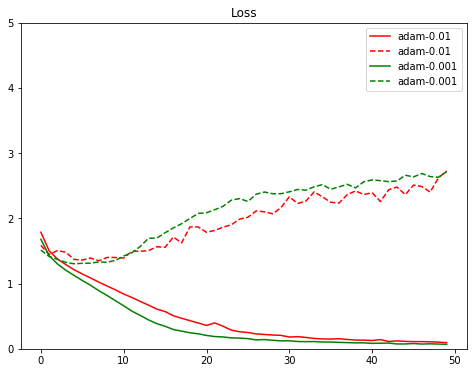

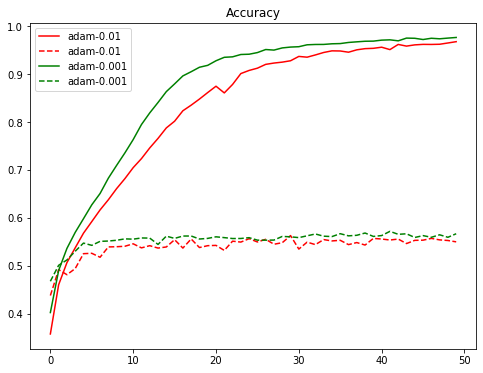

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()